---
<img src="https://ead.ufes.br/pluginfile.php/188426/course/summary/logo_cluster.png" style="float: right;">


#  Laboratório 01 - Algoritmos de clusterização


Neste Laboratório, vamos avaliar e comparar a qualidade do agrupamento nos algoritmos de clusterização com alguns datasets diferentes.

**Objetivos**

1. Entender o funcionamento dos algoritmos de clusterização: KMeans, DBSCAN, e Hierárquico.
2. Aplicar os algoritmos a diferentes datasets.
3. Comparar o desempenho de cada algoritmo utilizando métricas quantitativas.

**Resultados esperados**

Ao final deste laboratório é esperado que saiba identificar qual algoritmo se adapta melhor a diferentes cenários de dados.

**Valor**: 15 pontos

Para este Laboratório, vamos definir funções que permitam executas os algoritmos abaixo com determinados datasets:

1. **KMeans**
2. **DBSCAN**
3. **Clusterização Hierárquica**


# Parte 1: Datasets sem rótulos sobre os dados

**Valor**: 5 pontos

Inicialmente, iremos carregar os datasets sintéticos. Em seguida, você deverá:

1. Implementar as funções que executam os algoritmos de clusterização da scikitlearn
1. Implementar uma avaliação de medida interna
1. Executar os algortmos.

Importante: Não altere os nomes das funções, pois elas serão utilizadas em outras partes do código.

## 1. Importando as bibliotecas necessárias.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs, make_moons

## 2. Carregando datasets sintéticos

1. `X_blobs, y_blobs`: Conjunto de dados de 2 dimensões ($x,y$) criados de forma sintética com amostras bem agrupadas com formato globulares.
1. `X_moon, y_moon`: Conjunto de dados de 2 dimensões ($x,y$) criados de forma sintética com amostras bem agrupadas com formato de meia lua.

In [19]:
# Dataset 1: Blobs (Esférico)
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Dataset 2: Moons (Lua Crescente)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# definindo uma função para visualização dos dados.
def plot_scatter(X_axis, y_axis,title):

    if isinstance(X_axis, pd.DataFrame):
        X_axis = X_axis.values  # Convert to NumPy array
    plt.scatter(X_axis[:, 0], X_axis[:, 1], c=y_axis)
    plt.title(title)
    plt.show()

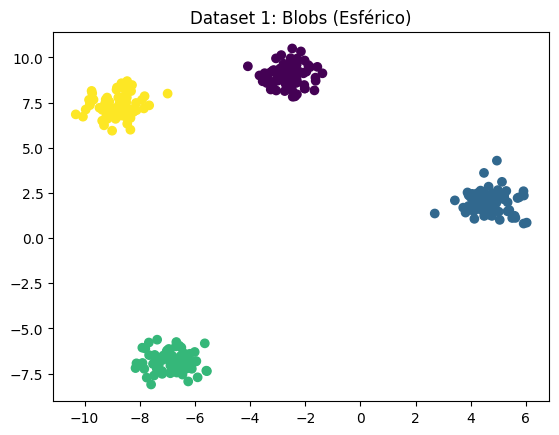

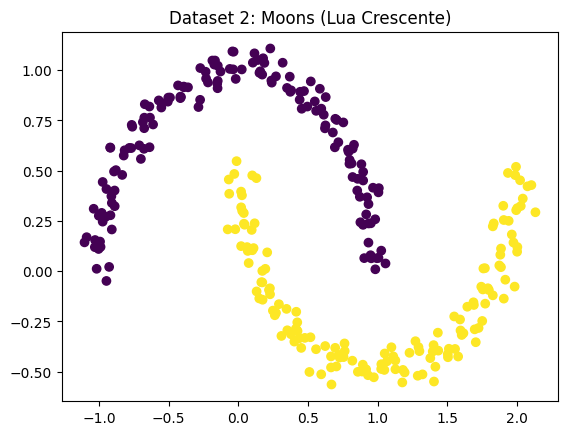

In [20]:
# Visualizando os datasets
plot_scatter(X_blobs, y_blobs, "Dataset 1: Blobs (Esférico)")
plot_scatter(X_moons, y_moons, "Dataset 2: Moons (Lua Crescente)")

## 3. Implemente as funções que para execução dos algoritmos de clusterização abaixo.

**Agora é com você!!!**

Utilizando a biblioteca `scikitlearn` desenvolva uma função que execute os algoritmos abaixo. O objetivo é ter uma função que facilite fazer chamadas de execução dos algoritmos para cada dataset.

> Revisite os Notebooks 01, 02, 03 e 04, se necessário.

### A.  **K-Means**

In [5]:
# Algoritmo KMeans
# X é o dataset que deverá ser agrupado e n_cluster o parâmetro k do K-means
#Retorna os labels dos clusters para cada ponto em X
def cluster_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    return kmeans.labels_


### B.  **DB-SCAN**

In [6]:
# Algoritmo DBSCAN
# X é o dataset que deverá ser agrupado e eps o raio e min_samples, o mínimo de elementos,
# como especificado pelo DB-SCAN
#Retorna os labels dos clusters para cada ponto em X
def cluster_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

### C. Hierárquico Aglomerativo

In [7]:
# Algoritmo Hierárquico Aglomerativo
# X é o dataset que deverá ser agrupado e n_cluster é a quantidade de  clusters final desejada
#Retorna os labels dos clusters para cada ponto em X
def cluster_hierarchical(X, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    return labels

## 4. Implemente uma função de avaliação de medidas internas

Neste exercício, vamos utilizar a `silhouete score` como métrica interna de avaliação dos agrupamentos gerados pelos algoritmos.

In [8]:
# Faça uma função que receba como parametros:
# O vetor de pontos original e o vetor de grupos pelo algoritmo
# retorne o silhouete_score da comparação dos vetores.
def avaliar_clustering(X, labels):
    score = silhouette_score(X, labels)
    return score

## 5. Execute os algoritmos de clusterização

Este exercício considera que você não alterou os nomes das funções definidas nos exercícios 3 e 4.

Você deve setar os valores dos principais parametros para cada dataset.

### A. K-Means

Altere o valor de $k$ até descobrir o que maximiza o silhouete score.

k=2, Coeficiente de Silhueta: 0.6155
k=3, Coeficiente de Silhueta: 0.7993
k=4, Coeficiente de Silhueta: 0.8756
k=5, Coeficiente de Silhueta: 0.7311
k=6, Coeficiente de Silhueta: 0.5853
k=7, Coeficiente de Silhueta: 0.4517
k=8, Coeficiente de Silhueta: 0.3296
k=9, Coeficiente de Silhueta: 0.3379
k=10, Coeficiente de Silhueta: 0.3592
Melhor k encontrado: 4 com Coeficiente de Silhueta 0.8756


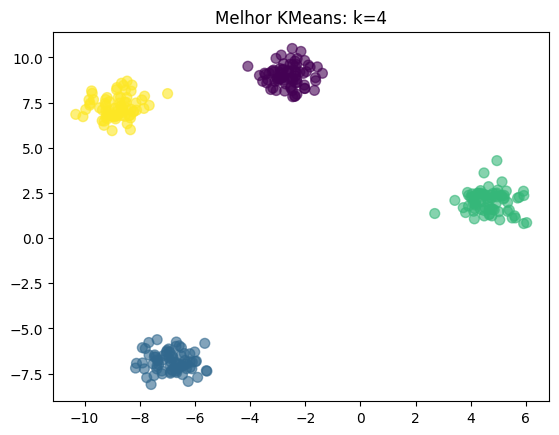

In [26]:
#@title Dataset  Blobs (KMeans)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def encontrar_melhor_k(X, k_min=2, k_max=10):
    melhor_k = k_min
    melhor_silhouette = -1
    melhor_labels = None
    
    for k in range(k_min, k_max + 1):
        labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        print(f"k={k}, Coeficiente de Silhueta: {silhouette_avg:.4f}")
        
        if silhouette_avg > melhor_silhouette:
            melhor_silhouette = silhouette_avg
            melhor_k = k
            melhor_labels = labels
    
    print(f"Melhor k encontrado: {melhor_k} com Coeficiente de Silhueta {melhor_silhouette:.4f}")
    
    return melhor_k, melhor_labels

def plot_scatter(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.show()

melhor_k, melhor_labels = encontrar_melhor_k(X_blobs, 2, 10)

plot_scatter(X_blobs, melhor_labels, f"Melhor KMeans: k={melhor_k}")


k=2, Coeficiente de Silhueta: 0.4877
k=3, Coeficiente de Silhueta: 0.4297
k=4, Coeficiente de Silhueta: 0.4512
k=5, Coeficiente de Silhueta: 0.4352
k=6, Coeficiente de Silhueta: 0.5035
k=7, Coeficiente de Silhueta: 0.5080
k=8, Coeficiente de Silhueta: 0.5263
k=9, Coeficiente de Silhueta: 0.5107
k=10, Coeficiente de Silhueta: 0.5100
Melhor k encontrado: 8 com Coeficiente de Silhueta 0.5263


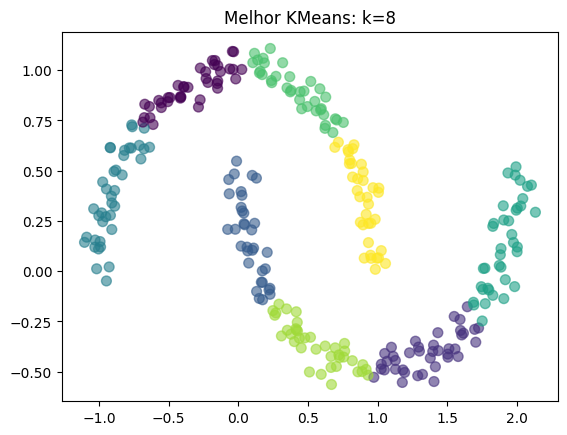

In [25]:
#@title Dataset Moon (KMeans)

def encontrar_melhor_k(X, k_min=2, k_max=10):
    melhor_k = k_min
    melhor_silhouette = -1
    melhor_labels = None
    
    for k in range(k_min, k_max + 1):
        labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        print(f"k={k}, Coeficiente de Silhueta: {silhouette_avg:.4f}")
        
        if silhouette_avg > melhor_silhouette:
            melhor_silhouette = silhouette_avg
            melhor_k = k
            melhor_labels = labels
    
    print(f"Melhor k encontrado: {melhor_k} com Coeficiente de Silhueta {melhor_silhouette:.4f}")
    
    return melhor_k, melhor_labels

def plot_scatter(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.show()

melhor_k_moons, melhor_labels_moons = encontrar_melhor_k(X_moons, 2, 10)

plot_scatter(X_moons, melhor_labels_moons, f"Melhor KMeans: k={melhor_k_moons}")


> **Pergunta**: Quais foram os melhores valores de $k$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**:

Blobs: 4 com Coeficiente de Silhueta 0.8756

Moon:  8 com Coeficiente de Silhueta 0.5263

### B. DB-SCAN

Altere os valores de $eps$ e $minPts$  até descobrir os que maximizam o silhouete score.

**Dica**: você pode alterar o código abaixo para iterar e testar os valores automaticamente.

**Observação**: Caso os valores dos parâmetro faça o algoritmo encontrar apenas UM cluster,  a função de cálculo do silhouete score irá retornar um erro de tamannho de array pois ela precisa de pelos dois clusters para identificar coesão e separação dos clusters.

eps=0.5, minPts=3, Coeficiente de Silhueta: 0.8285
eps=0.5, minPts=4, Coeficiente de Silhueta: 0.6751
eps=0.5, minPts=5, Coeficiente de Silhueta: 0.7984
eps=0.5, minPts=6, Coeficiente de Silhueta: 0.7787
eps=0.5, minPts=7, Coeficiente de Silhueta: 0.7479
eps=0.5, minPts=8, Coeficiente de Silhueta: 0.7368
eps=0.5, minPts=9, Coeficiente de Silhueta: 0.6820
eps=1.0, minPts=3, Coeficiente de Silhueta: 0.7735
eps=1.0, minPts=4, Coeficiente de Silhueta: 0.7735
eps=1.0, minPts=5, Coeficiente de Silhueta: 0.7735
eps=1.0, minPts=6, Coeficiente de Silhueta: 0.7849
eps=1.0, minPts=7, Coeficiente de Silhueta: 0.7849
eps=1.0, minPts=8, Coeficiente de Silhueta: 0.7849
eps=1.0, minPts=9, Coeficiente de Silhueta: 0.7849
eps=1.5, minPts=3, Coeficiente de Silhueta: 0.8756
eps=1.5, minPts=4, Coeficiente de Silhueta: 0.8756
eps=1.5, minPts=5, Coeficiente de Silhueta: 0.8756
eps=1.5, minPts=6, Coeficiente de Silhueta: 0.8756
eps=1.5, minPts=7, Coeficiente de Silhueta: 0.8756
eps=1.5, minPts=8, Coeficiente 

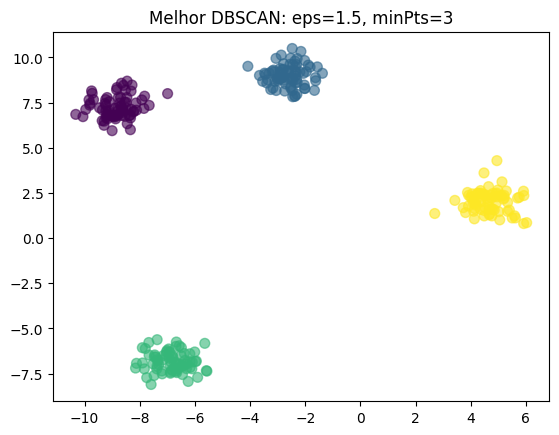

(np.float64(1.5),
 3,
 array([0, 0, 1, 2, 0, 2, 3, 2, 1, 3, 1, 3, 1, 1, 0, 1, 0, 3, 1, 1, 3, 1,
        2, 0, 1, 0, 0, 2, 2, 3, 1, 3, 0, 3, 0, 1, 0, 2, 0, 2, 3, 1, 0, 2,
        1, 1, 0, 3, 0, 3, 2, 0, 2, 1, 2, 3, 0, 3, 3, 1, 0, 3, 3, 0, 2, 2,
        2, 2, 2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 3,
        3, 3, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 3, 3, 3, 1, 1, 1, 1, 1, 2, 0,
        3, 1, 1, 1, 1, 3, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 3, 1,
        1, 1, 1, 3, 3, 0, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 2, 1, 1, 0, 3, 2,
        1, 3, 2, 0, 0, 3, 1, 0, 2, 0, 3, 0, 2, 1, 1, 1, 1, 1, 2, 3, 3, 2,
        2, 3, 3, 2, 0, 1, 0, 3, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 2, 2, 3,
        3, 0, 1, 1, 2, 3, 1, 2, 2, 0, 2, 1, 1, 2, 2, 3, 0, 2, 0, 0, 1, 0,
        0, 2, 0, 2, 3, 3, 0, 0, 3, 3, 3, 0, 1, 2, 3, 2, 0, 3, 0, 0, 0, 2,
        2, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 3, 1, 0, 1, 3, 1, 0, 1,
        2, 3, 2, 3, 3, 1, 1, 2, 3, 3, 0, 0, 2, 1, 1, 3, 3, 3, 3, 2, 0, 3,
        2, 3, 3,

In [ ]:
#@title Dataset Blobs (DBSCAN)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def cluster_dbscan(X, eps, min_samples):
    return DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)

def avaliar_clustering(X, labels):
    if len(set(labels)) > 1: 
        score = silhouette_score(X, labels)
        print(f"Coeficiente de Silhueta: {score:.4f}")
    else:
        print("Todos os pontos estão em um único cluster ou marcados como ruído. Silhueta não aplicável.")

def plot_scatter(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.show()

def encontrar_melhores_parametros_dbscan(X, eps_values, min_samples_values):
    melhor_eps = None
    melhor_minPts = None
    melhor_silhouette = -1
    melhor_labels = None
    
    for eps in eps_values:
        for minPts in min_samples_values:
            labels = cluster_dbscan(X, eps, minPts)
            
            if len(set(labels)) > 1:  # Garante que há mais de um cluster
                silhouette_avg = silhouette_score(X, labels)
                print(f"eps={eps}, minPts={minPts}, Coeficiente de Silhueta: {silhouette_avg:.4f}")
                
                if silhouette_avg > melhor_silhouette:
                    melhor_silhouette = silhouette_avg
                    melhor_eps = eps
                    melhor_minPts = minPts
                    melhor_labels = labels
    
    print(f"Melhores parâmetros: eps={melhor_eps}, minPts={melhor_minPts} com Coeficiente de Silhueta {melhor_silhouette:.4f}")
    
    # Plota o melhor clustering encontrado
    if melhor_labels is not None:
        plot_scatter(X, melhor_labels, f"Melhor DBSCAN: eps={melhor_eps}, minPts={melhor_minPts}")
    
    return melhor_eps, melhor_minPts, melhor_labels

# Exemplo de uso com um dataset de blobs
from sklearn.datasets import make_blobs
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Define intervalos para os parâmetros
eps_values = np.arange(0.5, 3.1, 0.5)  # Testando valores de eps de 0.5 a 3.0
min_samples_values = range(3, 10)  # Testando valores de minPts de 3 a 9

# Encontra os melhores parâmetros
encontrar_melhores_parametros_dbscan(X_blobs, eps_values, min_samples_values)

eps=0.1, minPts=3, Coeficiente de Silhueta: 0.2643
eps=0.1, minPts=4, Coeficiente de Silhueta: 0.2538
eps=0.1, minPts=5, Coeficiente de Silhueta: 0.2902
eps=0.1, minPts=6, Coeficiente de Silhueta: 0.3829
eps=0.1, minPts=7, Coeficiente de Silhueta: 0.2967
eps=0.1, minPts=8, Coeficiente de Silhueta: 0.1524
eps=0.1, minPts=9, Coeficiente de Silhueta: 0.0738
eps=0.2, minPts=3, Coeficiente de Silhueta: 0.3308
eps=0.2, minPts=4, Coeficiente de Silhueta: 0.3308
eps=0.2, minPts=5, Coeficiente de Silhueta: 0.3308
eps=0.2, minPts=6, Coeficiente de Silhueta: 0.3308
eps=0.2, minPts=7, Coeficiente de Silhueta: 0.3308
eps=0.2, minPts=8, Coeficiente de Silhueta: 0.3308
eps=0.2, minPts=9, Coeficiente de Silhueta: 0.3308
eps=0.30000000000000004, minPts=3, Coeficiente de Silhueta: 0.3308
eps=0.30000000000000004, minPts=4, Coeficiente de Silhueta: 0.3308
eps=0.30000000000000004, minPts=5, Coeficiente de Silhueta: 0.3308
eps=0.30000000000000004, minPts=6, Coeficiente de Silhueta: 0.3308
eps=0.300000000000

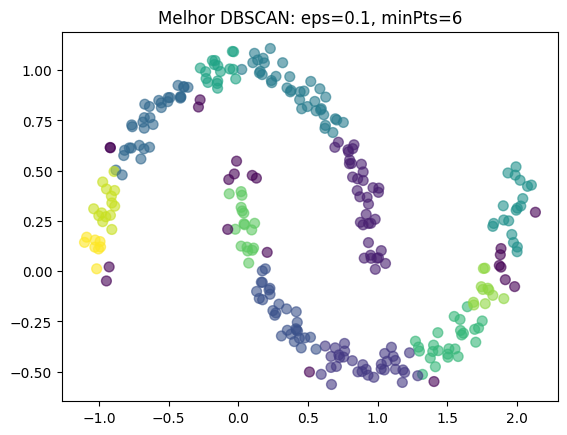

(np.float64(0.1),
 6,
 array([ 1,  9, -1,  0,  1,  1,  2,  3,  0,  2,  7,  4,  1,  4,  2,  1,  5,
         1, -1,  8,  6,  3,  7,  7,  3,  4, -1,  5,  8,  7,  0,  8,  0,  0,
         1,  3,  0,  6,  4,  6,  3,  6,  5,  4,  6,  4,  1,  1,  3,  1,  2,
        11,  7,  4,  5, -1,  3,  3,  2,  0,  1,  4,  0,  2,  2,  0,  0,  7,
         4,  2,  3, 10,  1,  2, 10,  5,  6,  6,  4,  5,  8, -1,  0,  3,  6,
         3,  3,  6,  0,  0,  2,  3,  4,  1,  4,  0,  2, -1,  9,  4,  1,  4,
         0,  2,  9,  1, 11,  0,  2,  3, 10,  7,  6,  7,  7,  3, 11,  5,  2,
         1,  4,  8,  2,  8, 10,  7,  4, 10,  2,  5, 10,  3,  8,  3, -1,  9,
         8,  2,  2,  0,  3, 11,  2,  3,  1,  7, 10,  6,  0,  6,  9,  3,  1,
         8,  5,  7,  1,  4,  2,  6,  1,  8,  0,  0,  0, 11,  5,  7,  8,  4,
         3,  1,  7,  4, -1,  7, 10,  0, -1, 11,  2,  0,  9,  9,  3,  9,  7,
         8,  3,  4,  4, -1,  1, -1,  7,  0,  5,  9,  0,  1,  0,  3,  0,  2,
         8,  1,  5, 10,  4, 10,  3,  5,  0,  4,  7,  4,  4,  5,  8

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def cluster_dbscan(X, eps, min_samples):
    return DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)

def avaliar_clustering(X, labels):
    if len(set(labels)) > 1:  # Evita erro quando todos os pontos estão em um único cluster ou ruído
        score = silhouette_score(X, labels)
        print(f"Coeficiente de Silhueta: {score:.4f}")
    else:
        print("Todos os pontos estão em um único cluster ou marcados como ruído. Silhueta não aplicável.")

def plot_scatter(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.show()

def encontrar_melhores_parametros_dbscan(X, eps_values, min_samples_values):
    melhor_eps = None
    melhor_minPts = None
    melhor_silhouette = -1
    melhor_labels = None
    
    for eps in eps_values:
        for minPts in min_samples_values:
            labels = cluster_dbscan(X, eps, minPts)
            
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(X, labels)
                print(f"eps={eps}, minPts={minPts}, Coeficiente de Silhueta: {silhouette_avg:.4f}")
                
                if silhouette_avg > melhor_silhouette:
                    melhor_silhouette = silhouette_avg
                    melhor_eps = eps
                    melhor_minPts = minPts
                    melhor_labels = labels
    
    print(f"Melhores parâmetros: eps={melhor_eps}, minPts={melhor_minPts} com Coeficiente de Silhueta {melhor_silhouette:.4f}")
    
    if melhor_labels is not None:
        plot_scatter(X, melhor_labels, f"Melhor DBSCAN: eps={melhor_eps}, minPts={melhor_minPts}")
    
    return melhor_eps, melhor_minPts, melhor_labels

eps_values = np.arange(0.1, 1.1, 0.1)  # Testando valores de eps de 0.1 a 1.0
min_samples_values = range(3, 10)  # Testando valores de minPts de 3 a 9

encontrar_melhores_parametros_dbscan(X_moons, eps_values, min_samples_values)


> **Pergunta**: Quais foram os melhores valores de $eps$ e $minPts$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**:

Blobs: eps=1.5, minPts=3 com Coeficiente de Silhueta 0.8756

Moon: eps=0.1, minPts=6 com Coeficiente de Silhueta 0.3829


### C. Hierárquico aglomerativo

Altere o valor de $num\_cluster$ até descobrir o que maximiza o silhouete score.

n=2, Coeficiente de Silhueta: 0.6155
n=3, Coeficiente de Silhueta: 0.7993
n=4, Coeficiente de Silhueta: 0.8756
n=5, Coeficiente de Silhueta: 0.7407
n=6, Coeficiente de Silhueta: 0.5939
n=7, Coeficiente de Silhueta: 0.4407
n=8, Coeficiente de Silhueta: 0.3069
n=9, Coeficiente de Silhueta: 0.3205
n=10, Coeficiente de Silhueta: 0.3270
Melhor n encontrado: 4 com Coeficiente de Silhueta 0.8756


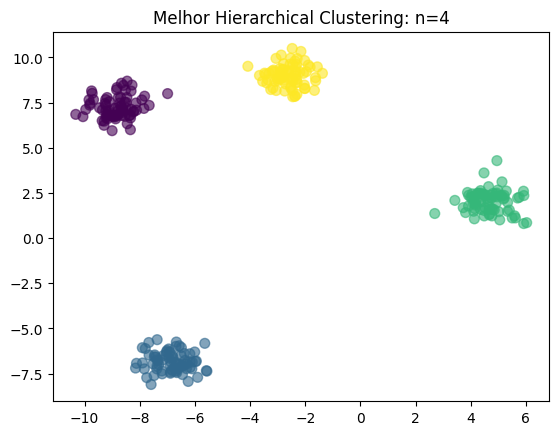

In [27]:
#@title Dataset  Blobs (Hierárquico)
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def cluster_hierarchical(X, n_clusters):
    return AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X)

def encontrar_melhor_n_clusters(X, n_min=2, n_max=10):
    melhor_n = n_min
    melhor_silhouette = -1
    melhor_labels = None
    
    for n in range(n_min, n_max + 1):
        labels = cluster_hierarchical(X, n_clusters=n)
        silhouette_avg = silhouette_score(X, labels)
        print(f"n={n}, Coeficiente de Silhueta: {silhouette_avg:.4f}")
        
        if silhouette_avg > melhor_silhouette:
            melhor_silhouette = silhouette_avg
            melhor_n = n
            melhor_labels = labels
    
    print(f"Melhor n encontrado: {melhor_n} com Coeficiente de Silhueta {melhor_silhouette:.4f}")
    
    return melhor_n, melhor_labels

def plot_scatter(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.show()

melhor_n_blobs, melhor_labels_blobs = encontrar_melhor_n_clusters(X_blobs, 2, 10)
plot_scatter(X_blobs, melhor_labels_blobs, f"Melhor Hierarchical Clustering: n={melhor_n_blobs}")

n=2, Coeficiente de Silhueta: 0.4407
n=3, Coeficiente de Silhueta: 0.3935
n=4, Coeficiente de Silhueta: 0.3955
n=5, Coeficiente de Silhueta: 0.4259
n=6, Coeficiente de Silhueta: 0.4958
n=7, Coeficiente de Silhueta: 0.5010
n=8, Coeficiente de Silhueta: 0.5041
n=9, Coeficiente de Silhueta: 0.4953
n=10, Coeficiente de Silhueta: 0.4877
Melhor n encontrado: 8 com Coeficiente de Silhueta 0.5041


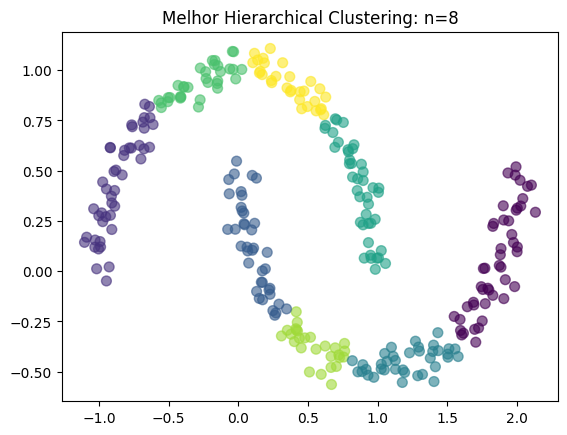

In [31]:
melhor_n_moons, melhor_labels_moons = encontrar_melhor_n_clusters(X_moons, 2, 10)
plot_scatter(X_moons, melhor_labels_moons, f"Melhor Hierarchical Clustering: n={melhor_n_moons}")

# Parte 2. -  Avaliando um dataset com rótulos

**Valor**: 5 pontos

Nesta parte, iremos carregar e avaliar a clusterização do dataset Iris.
O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris.

In [32]:
from sklearn.datasets import load_iris

# Dataset 3: Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

## 6. Avaliação com medida externa

Implemente uma funcção que retorne o rand score de um algortimo de clusterização.

Observe que a assinatura da função será semelhante a implementada no exercício anterior.

In [ ]:
from sklearn.metrics import  rand_score
# Faça uma função que receba como parametros:
# O vetor de pontos original, o vetor de grupos pelo algoritmo e os labels verdadeiros
# retorne o silhouete_score da comparação dos vetores.
def avaliar_clustering_externo(X, labels, true_labels):
    silhouette = silhouette_score(X, labels)
    rand = rand_score(true_labels, labels)
    return silhouette, rand


## 7. Compare os KMeans, DBSCAN e Hierárquico

### A. K-Means

Altere o valor de $k$ até descobrir o que maximiza o silhouete score.

k=2 -> Silhouette Score: 0.6810, Rand Score: 0.7637
k=3 -> Silhouette Score: 0.5512, Rand Score: 0.8737
k=4 -> Silhouette Score: 0.4976, Rand Score: 0.8306
k=5 -> Silhouette Score: 0.4931, Rand Score: 0.8432
k=6 -> Silhouette Score: 0.3678, Rand Score: 0.7881
k=7 -> Silhouette Score: 0.3543, Rand Score: 0.8034
k=8 -> Silhouette Score: 0.3447, Rand Score: 0.7902
k=9 -> Silhouette Score: 0.3156, Rand Score: 0.7903
k=10 -> Silhouette Score: 0.3014, Rand Score: 0.7793

Melhor k encontrado: 3 com Silhouette Score: 0.5512 e Rand Score: 0.8737


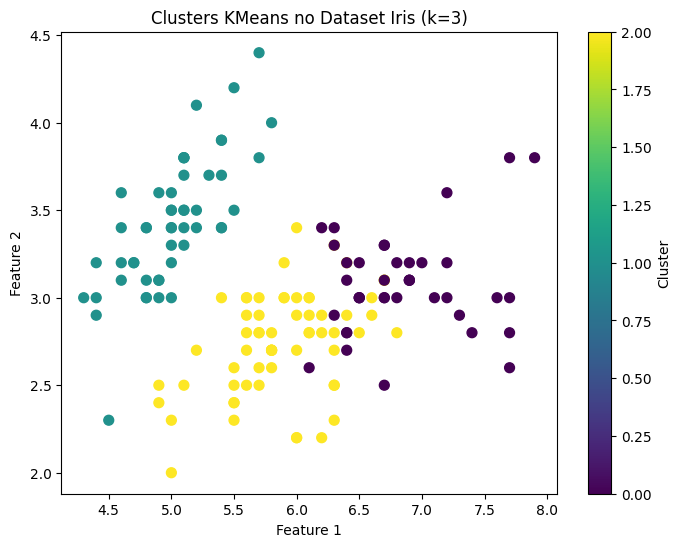

In [41]:
#@title Dataset Iris (KMeans)
melhor_k = None
melhor_silhouette = -1
melhor_rand_score = -1
melhor_labels = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_iris)
    labels_iris = kmeans.labels_

    s_score, r_score = avaliar_clustering_externo(X_iris, labels_iris, y_iris)
    print(f"k={k} -> Silhouette Score: {s_score:.4f}, Rand Score: {r_score:.4f}")

    if r_score > melhor_rand_score: 
        melhor_k = k
        melhor_silhouette = s_score
        melhor_rand_score = r_score
        melhor_labels = labels_iris

print(f"\nMelhor k encontrado: {melhor_k} com Silhouette Score: {melhor_silhouette:.4f} e Rand Score: {melhor_rand_score:.4f}")

# Plotando os clusters com o melhor k encontrado
plt.figure(figsize=(8, 6))
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=melhor_labels, cmap='viridis', s=50, marker='o')
plt.title(f"Clusters KMeans no Dataset Iris (k={melhor_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

> **Pergunta**: Quais foram os melhores valores de $k$, isto é, que retornam o máximo `rand index`?

**Resposta**: k=3 -> Silhouette Score: 0.5512, Rand Score: 0.8737


### B. DB-SCAN

Altere os valores de $eps$ e $minPts$  até descobrir os que maximizam o silhouete score.

**Dica**: você pode alterar o código abaixo para iterar e testar os valores automaticamente.

**Observação**: Caso os valores dos parâmetro faça o algoritmo encontrar apenas UM cluster,  a função de cálculo do silhouete score irá retornar um erro de tamannho de array pois ela precisa de pelos dois clusters para identificar coesão e separação dos clusters.

eps=0.20, minPts=3 -> Silhouette Score: -0.3435, Número de clusters: 6
eps=0.20, minPts=4 -> Silhouette Score: -0.3298, Número de clusters: 3
eps=0.20, minPts=5 -> Silhouette Score: 0.1826, Número de clusters: 2
eps=0.20, minPts=6 -> Silhouette Score: 0.1584, Número de clusters: 2
eps=0.20, minPts=7 -> Silhouette Score: 0.1227, Número de clusters: 1
eps=0.20, minPts=8 -> Silhouette Score: 0.1086, Número de clusters: 1
eps=0.30, minPts=3 -> Silhouette Score: 0.0317, Número de clusters: 9
eps=0.30, minPts=4 -> Silhouette Score: -0.0465, Número de clusters: 6
eps=0.30, minPts=5 -> Silhouette Score: -0.0521, Número de clusters: 3
eps=0.30, minPts=6 -> Silhouette Score: 0.0406, Número de clusters: 2
eps=0.30, minPts=7 -> Silhouette Score: 0.0083, Número de clusters: 2
eps=0.30, minPts=8 -> Silhouette Score: 0.4548, Número de clusters: 1
eps=0.30, minPts=9 -> Silhouette Score: 0.4397, Número de clusters: 1
eps=0.30, minPts=10 -> Silhouette Score: 0.3078, Número de clusters: 2
eps=0.40, minPt

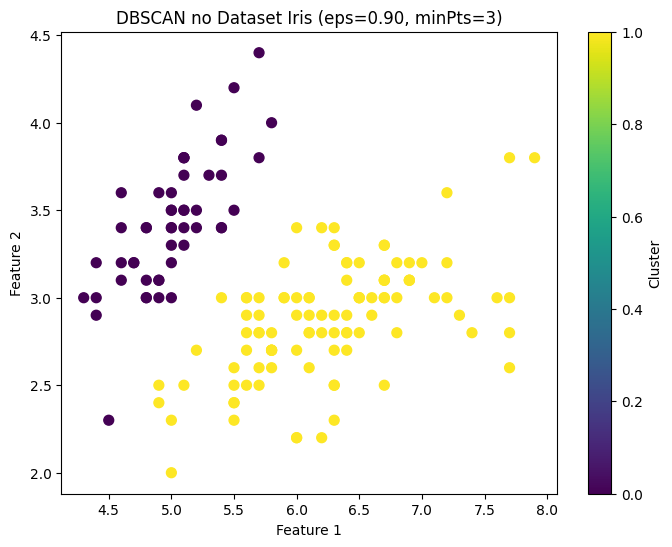

In [46]:
#@title Dataset Iris (DBSCAN)
def avaliar_clustering_externo(X, labels, true_labels):
    silhouette = silhouette_score(X, labels)
    return silhouette

def cluster_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    return labels

melhor_eps = None
melhor_minPts = None
melhor_silhouette = -1
melhor_labels = None

eps_values = np.linspace(0.1, 1.0, 10)
minPts_values = range(3, 11)

for eps in eps_values:
    for minPts in minPts_values:
        labels_dbscan = cluster_dbscan(X_iris, eps, minPts)

        if len(set(labels_dbscan)) > 1:
            s_score = avaliar_clustering_externo(X_iris, labels_dbscan, y_iris)
            num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

            print(f"eps={eps:.2f}, minPts={minPts} -> Silhouette Score: {s_score:.4f}, Número de clusters: {num_clusters}")

            if s_score > melhor_silhouette:
                melhor_eps = eps
                melhor_minPts = minPts
                melhor_silhouette = s_score
                melhor_labels = labels_dbscan

print(f"\nMelhor eps: {melhor_eps:.2f}, Melhor minPts: {melhor_minPts} com Silhouette Score: {melhor_silhouette:.4f} e Número de clusters: {num_clusters}")

plt.figure(figsize=(8, 6))
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=melhor_labels, cmap='viridis', s=50, marker='o')
plt.title(f"DBSCAN no Dataset Iris (eps={melhor_eps:.2f}, minPts={melhor_minPts})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()


> **Pergunta**: Quais foram os melhores valores de $eps$ e $minPts$, isto é, que retornam o máximo `silhouete score` para cada dataset?

**Resposta**: Melhor eps: 0.90, Melhor minPts: 3 com Silhouette Score: 0.6867


### C. Hierárquico aglomerativo

Altere o valor de $num\_cluster$ até descobrir o que maximiza o rand index.

num_cluster=2 -> Silhouette Score: 0.6867, Rand Score: 0.7763
num_cluster=3 -> Silhouette Score: 0.5543, Rand Score: 0.8797
num_cluster=4 -> Silhouette Score: 0.4890, Rand Score: 0.8583
num_cluster=5 -> Silhouette Score: 0.4844, Rand Score: 0.8346
num_cluster=6 -> Silhouette Score: 0.3592, Rand Score: 0.7801
num_cluster=7 -> Silhouette Score: 0.3422, Rand Score: 0.7908
num_cluster=8 -> Silhouette Score: 0.3436, Rand Score: 0.7836
num_cluster=9 -> Silhouette Score: 0.3305, Rand Score: 0.7772
num_cluster=10 -> Silhouette Score: 0.2925, Rand Score: 0.7589

Melhor num_cluster encontrado: 3 com Silhouette Score: 0.5543 e Rand Score: 0.8797


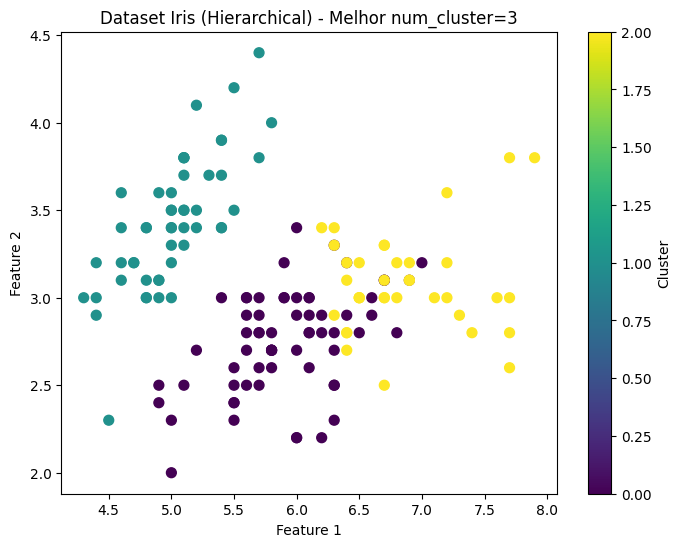

In [44]:
#@title Dataset  Iris (Hierárquico)
def cluster_hierarchical(X, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    return labels

def avaliar_clustering_externo(X, labels, true_labels):
    silhouette = silhouette_score(X, labels)
    rand = rand_score(true_labels, labels)
    return silhouette, rand

def plot_scatter(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, marker='o')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Cluster")
    plt.show()

melhor_k = None
melhor_silhouette = -1
melhor_rand_score = -1
melhor_labels = None

for num_cluster in range(2, 11): 
    labels_hier_iris = cluster_hierarchical(X_iris, n_clusters=num_cluster)
    
    s_score, r_score = avaliar_clustering_externo(X_iris, labels_hier_iris, y_iris)
    print(f"num_cluster={num_cluster} -> Silhouette Score: {s_score:.4f}, Rand Score: {r_score:.4f}")

    if r_score > melhor_rand_score:
        melhor_k = num_cluster
        melhor_silhouette = s_score
        melhor_rand_score = r_score
        melhor_labels = labels_hier_iris

print(f"\nMelhor num_cluster encontrado: {melhor_k} com Silhouette Score: {melhor_silhouette:.4f} e Rand Score: {melhor_rand_score:.4f}")

plot_scatter(X_iris, melhor_labels, f"Dataset Iris (Hierarchical) - Melhor num_cluster={melhor_k}")

### Visualizando hierárquia entre os pontos com um dendograma.

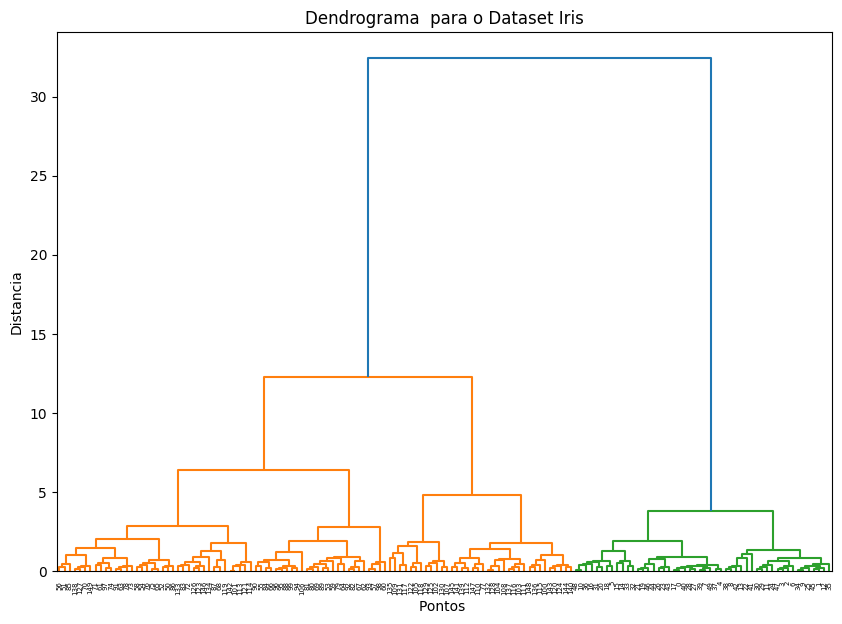

In [45]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_iris, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrograma  para o Dataset Iris")
plt.xlabel("Pontos ")
plt.ylabel("Distancia")
plt.show()

#  Parte 3: Discussão sobre os resultados

**Valor**: 5 pontos


Discuta sobre os resultados obtidos até aqui no campo abaixo. A discussão deve conter para qual tipo de dado cada algoritmos funcionou melhor e qual(is) parâmetros influenciaram na qualidade dos clusters.


> Escreva sua resposta aqui.

No caso do conjunto de dados do iris, Kmeans e Hierárquico aglomerativo retornaram melhores métricas de avaliação para o número de classes igual a 3, que é a quantidade real de classes pra este conjunto de dados. O DBscan apresentou um resultado pior em relação aos outros, classificando apenas em 2 classes, possivelmente teve desempenho inferior devido à sua dependência dos parâmetros de distância e ao fato de não ser ideal para conjuntos de dados bem separados e sem muito ruído.